<a href="https://colab.research.google.com/github/Immanuel-01/Global-Health/blob/main/Copy_of_Global_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset

gbh = pd.read_csv("Global Health Statistics.csv")

# Check the number of rows in the dataset
print(f"Total rows in the dataset: {len(gbh)}")

Total rows in the dataset: 1000000


In [ ]:
# Check the number of rows in the subset
print(f"Number of rows in the subset: {len(gbh)}")

Number of rows in the subset: 1000000


In [ ]:
# Display the first few rows of the dataset

print(gbh.head())

     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Hospital Beds per 1000  Treatment Type  \
0               471007  ...                    7.58      Medication  

In [ ]:
print(gbh.info())   # Get basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [ ]:
print(gbh.describe())  # Summary statistics for numerical columns

                 Year  Prevalence Rate (%)  Incidence Rate (%)  \
count  1000000.000000       1000000.000000      1000000.000000   
mean      2011.996999            10.047992            7.555005   
std          7.217287             5.740189            4.298947   
min       2000.000000             0.100000            0.100000   
25%       2006.000000             5.090000            3.840000   
50%       2012.000000            10.040000            7.550000   
75%       2018.000000            15.010000           11.280000   
max       2024.000000            20.000000           15.000000   

       Mortality Rate (%)  Population Affected  Healthcare Access (%)  \
count      1000000.000000       1000000.000000         1000000.000000   
mean             5.049919        500735.427363              74.987835   
std              2.859427        288660.116648              14.436345   
min              0.100000          1000.000000              50.000000   
25%              2.580000        250491.

In [ ]:
# Check for missing values

print(gbh.isnull().sum())

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns with the median
numerical_columns = ['Average Treatment Cost (USD)', 'Recovery Rate (%)', 'DALYs',
                     'Improvement in 5 Years (%)', 'Per Capita Income (USD)',
                     'Education Index', 'Urbanization Rate (%)']
imputer = SimpleImputer(strategy='median')
gbh[numerical_columns] = imputer.fit_transform(gbh[numerical_columns])


In [ ]:
# Impute missing values for categorical columns with the most frequent category
categorical_columns = ['Treatment Type', 'Availability of Vaccines/Treatment']
imputer_cat = SimpleImputer(strategy='most_frequent')
gbh[categorical_columns] = imputer_cat.fit_transform(gbh[categorical_columns])


In [ ]:
print(gbh.isnull().sum())  # Check if there are still any missing values


Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


In [ ]:
# Check for duplicates
print(gbh.duplicated().sum())

0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-12-59c2b31816c5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diseases_counts.index, y=diseases_counts.values, palette="viridis")


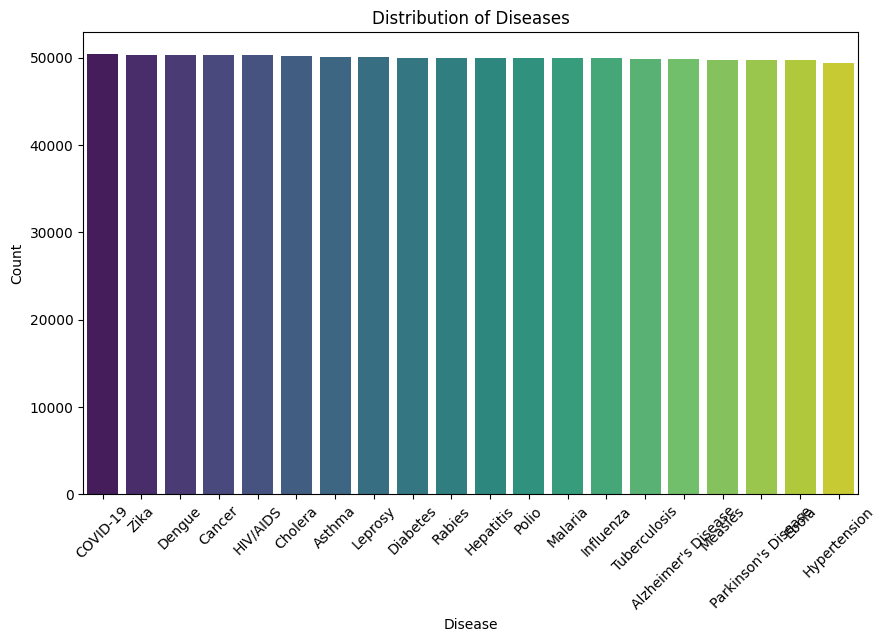

In [ ]:
diseases_counts = gbh['Disease Name'].value_counts()  # Count the occurrences of each disease

# Plot the distribution of diseases
plt.figure(figsize=(10, 6))
sns.barplot(x=diseases_counts.index, y=diseases_counts.values, palette="viridis")
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

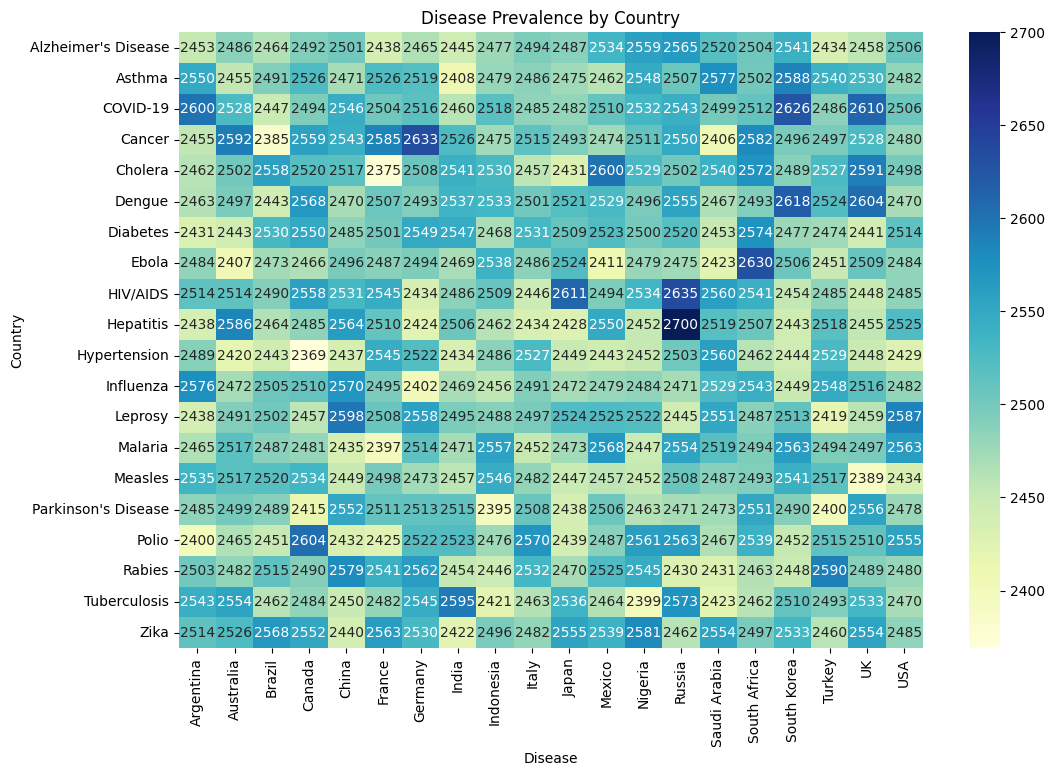

In [ ]:
# Group by country and disease

country_diseases = gbh.groupby(['Disease Name','Country']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_diseases, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Disease Prevalence by Country")
plt.xlabel("Disease")
plt.ylabel("Country")
plt.show()

In [ ]:
# Check the percentage of missing data in each column
missing_percentage = gbh.isnull().mean() * 100
print(missing_percentage)


Country                               0.0
Year                                  0.0
Disease Name                          0.0
Disease Category                      0.0
Prevalence Rate (%)                   0.0
Incidence Rate (%)                    0.0
Mortality Rate (%)                    0.0
Age Group                             0.0
Gender                                0.0
Population Affected                   0.0
Healthcare Access (%)                 0.0
Doctors per 1000                      0.0
Hospital Beds per 1000                0.0
Treatment Type                        0.0
Average Treatment Cost (USD)          0.0
Availability of Vaccines/Treatment    0.0
Recovery Rate (%)                     0.0
DALYs                                 0.0
Improvement in 5 Years (%)            0.0
Per Capita Income (USD)               0.0
Education Index                       0.0
Urbanization Rate (%)                 0.0
dtype: float64


Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')
        Year  Prevalence Rate (%)
911654  2000                19.44
123799  2000                17.02
663652  2000                12.69
123797  2000                 0.56
771033  2000                 7.44


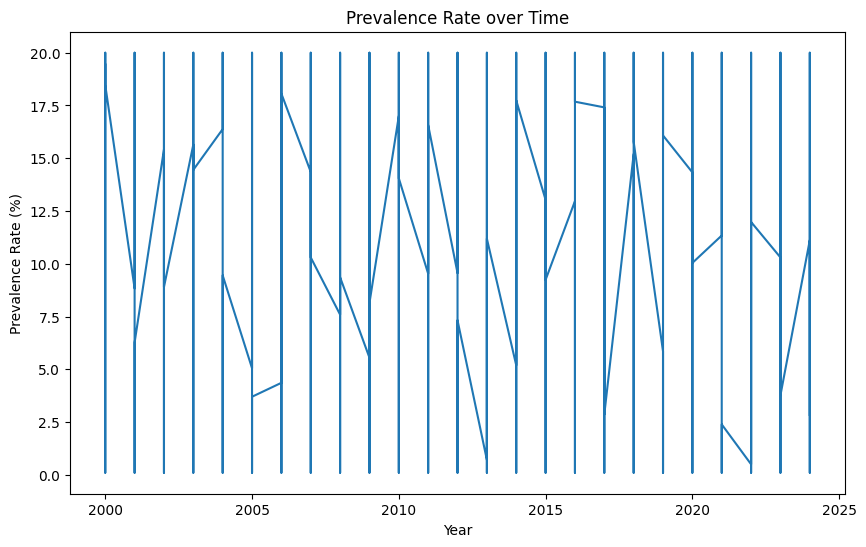

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if there is a time-related column
print(gbh.columns)

# Example: Check if the 'Year' or 'Date' column exists
if 'Year' in gbh.columns:
    # Sort the dataset by 'Year' to see if it's structured over time
    gbh_sorted = gbh.sort_values(by='Year')
    print(gbh_sorted[['Year', 'Prevalence Rate (%)']].head())

    # Visualize time-related features (e.g., Prevalence Rate over Year)
    plt.figure(figsize=(10, 6))
    plt.plot(gbh_sorted['Year'], gbh_sorted['Prevalence Rate (%)'])
    plt.xlabel('Year')
    plt.ylabel('Prevalence Rate (%)')
    plt.title('Prevalence Rate over Time')
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


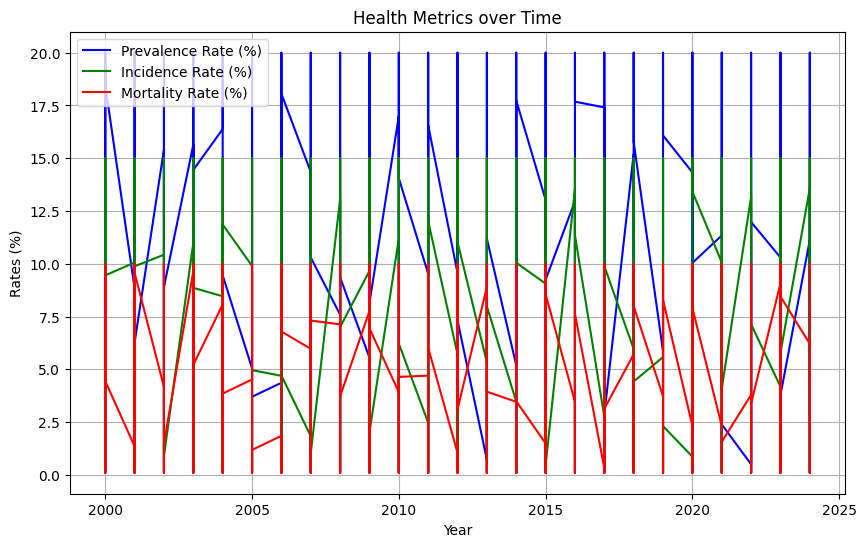

In [ ]:
import matplotlib.pyplot as plt

# Plot Prevalence Rate over Year
plt.figure(figsize=(10, 6))
gbh_sorted = gbh.sort_values(by='Year')
plt.plot(gbh_sorted['Year'], gbh_sorted['Prevalence Rate (%)'], label='Prevalence Rate (%)', color='blue')

# Optionally plot other metrics
plt.plot(gbh_sorted['Year'], gbh_sorted['Incidence Rate (%)'], label='Incidence Rate (%)', color='green')
plt.plot(gbh_sorted['Year'], gbh_sorted['Mortality Rate (%)'], label='Mortality Rate (%)', color='red')

plt.xlabel('Year')
plt.ylabel('Rates (%)')
plt.title('Health Metrics over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Perform one-hot encoding for categorical columns
gbh = pd.get_dummies(gbh, columns=['Country', 'Disease Name', 'Treatment Type'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns for scaling
numerical_columns = ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
                     'Population Affected', 'Healthcare Access (%)', 'Doctors per 1000',
                     'Hospital Beds per 1000', 'Average Treatment Cost (USD)', 'Recovery Rate (%)',
                     'DALYs', 'Improvement in 5 Years (%)', 'Per Capita Income (USD)', 'Education Index',
                     'Urbanization Rate (%)']

# Scale the numerical features
scaler = StandardScaler()
gbh[numerical_columns] = scaler.fit_transform(gbh[numerical_columns])


In [ ]:
# Feature Engineering: Combine healthcare access and doctors per 1000
gbh['Healthcare_Quality'] = gbh['Healthcare Access (%)'] * gbh['Doctors per 1000']


In [ ]:
# Create a binary classification target based on Prevalence Rate (%)
# Use median as the threshold to define high/low prevalence
threshold = gbh['Prevalence Rate (%)'].median()
gbh['Prevalence Category'] = (gbh['Prevalence Rate (%)'] > threshold).astype(int)

# Check the new target column
print(gbh[['Prevalence Rate (%)', 'Prevalence Category']].head())


   Prevalence Rate (%)  Prevalence Category
0            -1.584965                    0
1             0.420197                    1
2            -1.591933                    0
3            -0.935160                    0
4            -1.605870                    0


In [ ]:
# Include the newly engineered 'Healthcare_Quality' feature
X = gbh.drop(columns=['Prevalence Rate (%)', 'Prevalence Category'])  # Exclude target and original prevalence
y = gbh['Prevalence Category']  # Target variable for classification (high/low prevalence)


In [ ]:
# Include the newly engineered 'Healthcare_Quality' feature
X = gbh.drop(columns=['Prevalence Rate (%)', 'Prevalence Category'])  # Exclude target and original prevalence
y = gbh['Prevalence Category']  # Target variable for classification (high/low prevalence)

# Verify the shape of X and y
print(X.shape, y.shape)


(1000000, 60) (1000000,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (800000, 60)
Test data shape: (200000, 60)


In [ ]:
# One-Hot Encode the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid multicollinearity

# Define the target variable
y = gbh['Prevalence Category']  # This should already be binary (0 and 1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Logistic Regression Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred_lr)}")


Logistic Regression Evaluation
Accuracy: 0.5013
Confusion Matrix: 
[[57204 42460]
 [57280 43056]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.57      0.53     99664
           1       0.50      0.43      0.46    100336

    accuracy                           0.50    200000
   macro avg       0.50      0.50      0.50    200000
weighted avg       0.50      0.50      0.50    200000



In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Use the best model
best_lr_model = grid_search.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test_scaled)

# Evaluate the tuned Logistic Regression model
print("Improved Logistic Regression Evaluation")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_lr)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_best_lr)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred_best_lr)}")


Improved Logistic Regression Evaluation
Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Accuracy: 0.50127
Confusion Matrix: 
[[57313 42351]
 [57395 42941]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.58      0.53     99664
           1       0.50      0.43      0.46    100336

    accuracy                           0.50    200000
   macro avg       0.50      0.50      0.50    200000
weighted avg       0.50      0.50      0.50    200000



In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred_rf)}")



Random Forest Classifier Evaluation
Accuracy: 0.499995
Confusion Matrix: 
[[54384 45280]
 [54721 45615]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.55      0.52     99664
           1       0.50      0.45      0.48    100336

    accuracy                           0.50    200000
   macro avg       0.50      0.50      0.50    200000
weighted avg       0.50      0.50      0.50    200000



In [ ]:
# XGBoost Classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_xgb)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred_xgb)}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Evaluation
Accuracy: 0.499905
Confusion Matrix: 
[[51319 48345]
 [51674 48662]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     99664
           1       0.50      0.48      0.49    100336

    accuracy                           0.50    200000
   macro avg       0.50      0.50      0.50    200000
weighted avg       0.50      0.50      0.50    200000



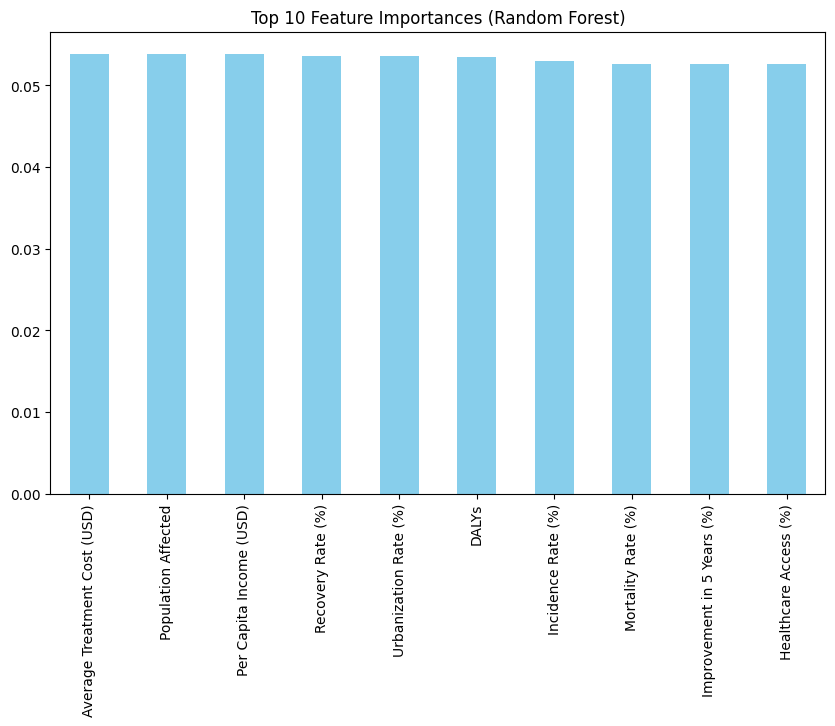

In [ ]:
# Feature importance from Random Forest
feature_importance_rf = rf_model.feature_importances_
important_features = pd.Series(feature_importance_rf, index=X_encoded.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
important_features.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.5004 - loss: 0.6985 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 2/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.5015 - val_loss: 0.6933
Epoch 3/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.4985 - val_loss: 0.6932
Epoch 4/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6932
Epoch 5/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6931
Epoch 6/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4985 - val_loss: 0.6932
Epoch 7/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 8/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 

In [ ]:
import numpy as np
print("Unique Classes in y_train_encoded:", np.unique(y_train_encoded))



Unique Classes in y_train_encoded: [0 1]


In [ ]:
# Original target distribution
print("Original Class Distribution in y_train_encoded:")
print(pd.Series(y_train_encoded).value_counts())


Original Class Distribution in y_train_encoded:
0    400683
1    399317
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model architecture with hyperparameters
def build_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Build the model with default parameters
model = build_model()

# Train the model
history = model.fit(X_train_scaled, y_train_encoded,
                     validation_data=(X_test_scaled, y_test_encoded),
                     epochs=50,
                     batch_size=32,
                     verbose=1)


Epoch 1/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.5004 - loss: 0.6985 - val_accuracy: 0.5011 - val_loss: 0.6932
Epoch 2/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.5018 - val_loss: 0.6932
Epoch 3/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5018 - val_loss: 0.6931
Epoch 4/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5017 - val_loss: 0.6931
Epoch 5/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 6/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 7/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4982 - val_loss: 0.6932
Epoch 8/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 

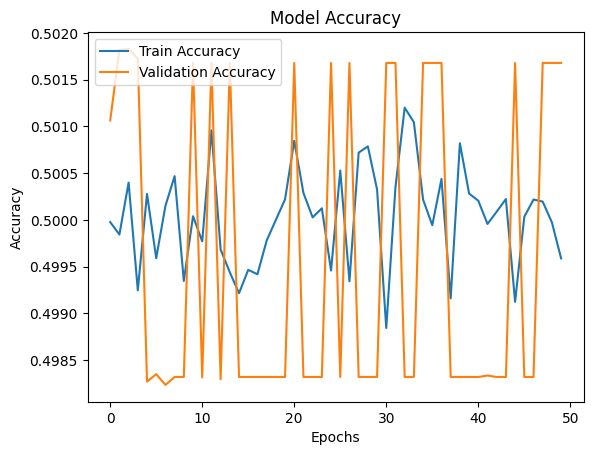

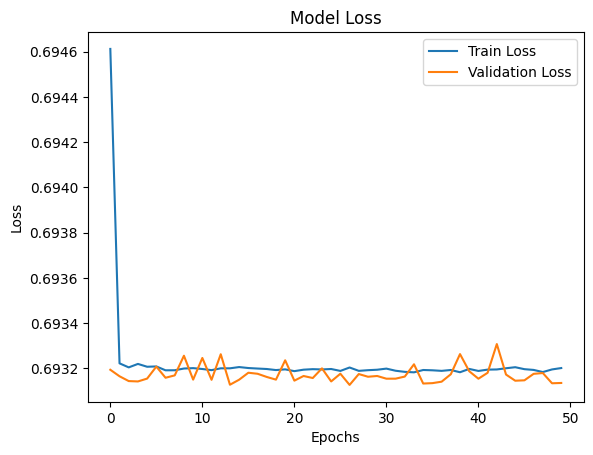

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.5017
Test Loss: 0.6931


In [ ]:
# Make predictions on test set
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_classes))


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 830us/step
Confusion Matrix:
[[     0  99664]
 [     0 100336]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     99664
           1       0.50      1.00      0.67    100336

    accuracy                           0.50    200000
   macro avg       0.25      0.50      0.33    200000
weighted avg       0.25      0.50      0.34    200000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
new_data = pd.DataFrame({
    'Country': ['United Kingdom'],
    'Year': [2025],
    'Disease Name': ['Measles'],  # This would be mapped/encoded if necessary
    'Healthcare Access (%)': [92],  # Example value for UK
    'Doctors per 1000': [2.8],  # Example value for UK
    'Population Affected': [200000],  # Example affected population
    'Average Treatment Cost (USD)': [1500],  # Example value
    'Per Capita Income (USD)': [45000],  # Example value for UK
    'Urbanization Rate (%)': [80],  # Example urbanization rate
    'Recovery Rate (%)': [85],  # Example recovery rate
    'DALYs': [4.5]  # Example value
})


In [ ]:
encoded_new_data = pd.get_dummies(new_data, columns=['Country', 'Disease Name'])


In [ ]:
encoded_new_data = encoded_new_data.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
new_data_scaled = scaler.transform(encoded_new_data)


In [ ]:
predictions = model.predict(new_data_scaled)
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.5006899]]


In [ ]:
# Use the trained deep learning model to make predictions
prediction = model.predict(new_data_scaled)

# Since it's binary classification (0 or 1), you may want to interpret the result:
prediction_label = 'High Prevalence' if prediction[0] > 0.5 else 'Low Prevalence'
print(f"Predicted Prevalence for Disease_ABC in the UK: {prediction_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Prevalence for Disease_ABC in the UK: High Prevalence


In [ ]:
# Get the predicted probabilities for the new data
predicted_probability = model.predict(new_data_scaled)

# Since it’s binary classification, predicted_probability will be a 2D array with shape (n_samples, 1)
# For class 1 (positive class), you can directly access the probability as follows:
print(f"Predicted Probability for High Prevalence: {predicted_probability[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Probability for High Prevalence: 0.5006899237632751


In [ ]:
# Define classification bins
def classify_prevalence(value):
    if value < 5:
        return 0  # Low
    elif 5 <= value < 15:
        return 1  # Medium
    else:
        return 2  # High

# Apply the function to create class labels
gbh['Prevalence Class'] = gbh['Prevalence Rate (%)'].apply(classify_prevalence)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import numpy as np

# Ensure the data is sorted by time
gbh = gbh.sort_values('Year')

# Select features and target
features = ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
            'Healthcare Access (%)', 'Doctors per 1000', 'Population Affected']
X_raw = gbh[features].values

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)

# Create sequences for time-series classification
time_steps = 3
X, y = [], []

for i in range(len(X_scaled) - time_steps):
    X.append(X_scaled[i:i + time_steps])
    y.append(gbh['Prevalence Class'].iloc[i + time_steps])

X = np.array(X)
y = np.array(y)

# Check if y has integer values for class labels
print(f"Before one-hot encoding: y shape = {y.shape}, unique values in y = {np.unique(y)}")

# One-hot encode the target
y_encoded = to_categorical(y, num_classes=3)  # Make sure num_classes is 3 for 3 classes
print(f"After one-hot encoding: y_encoded shape = {y_encoded.shape}")


Before one-hot encoding: y shape = (999997,), unique values in y = [0]
After one-hot encoding: y_encoded shape = (999997, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Dropout

# Define the model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.3),  # Dropout after the convolutional layer

    LSTM(50, return_sequences=True),
    Dropout(0.3),  # Dropout after the first LSTM layer

    LSTM(50),
    Dropout(0.3),  # Dropout after the second LSTM layer

    Dense(32, activation='relu'),
    Dropout(0.3),  # Dropout after dense layer to improve generalization

    Dense(3, activation='softmax')  # Output layer for 3 classes: Low, Medium, High
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(X, y_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2, 64)               │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 2, 50)               │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,763 (178.76 KB)

 Trainable params: 45,763 (178.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 136s 5ms/step - accuracy: 0.9991 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 134s 5ms/step - accuracy: 1.0000 - loss: 7.8661e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 132s 5ms/step - accuracy: 1.0000 - loss: 8.8107e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 131s 5ms/step - accuracy: 1.0000 - loss: 2.8449e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 128s 5ms/step - accuracy: 1.0000 - loss: 2.4210e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 130s 5ms/step - accuracy: 1.0000 - loss: 2.7087e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 128s 5ms/step - accuracy: 1.0000 - loss: 1.7720e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50

In [ ]:
# Now proceed with training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Dropout

model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for Low, Medium, High
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X, y_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 2, 64)               │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 2, 50)               │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,763 (178.76 KB)

 Trainable params: 45,763 (178.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 142s 6ms/step - accuracy: 0.9995 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 117s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 116s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 116s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 112s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 112s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50

In [ ]:
# Predict class probabilities
predicted_probabilities = model.predict(X)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

print("Sample Predicted Classes:", predicted_classes[:5])
print("Actual Classes:", y[:5])

# Visualize Predictions
plt.plot(y[:20], marker='o', label='Actual')
plt.plot(predicted_classes[:20], marker='x', label='Predicted')
plt.title('CNN-LSTM Classification Results')
plt.xlabel('Sample Index')
plt.ylabel('Prevalence Class (0: Low, 1: Medium, 2: High)')
plt.legend()
plt.show()
